In [9]:
# General imports
import numpy as np
import matplotlib.pyplot as plt

# Data Analysis
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import confusion_matrix


# Custom Stuff
# required for importin modules from other directories
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

from common import data_parser, misc
from common.model_trainer import ModelTrainer
import companies_data_preprocessor

# Data Preparation

In [10]:
df = data_parser.parse_companies(5)
raw_data, labels = companies_data_preprocessor.preprocess(df, MinMaxScaling=True, imputation=1)



# Model Training

In [11]:
params = {
    "n_estimators" : list(range(2,50)), 
    "criterion" : ["gini", "entropy"],
    "random_state" : [1],
    "bootstrap" : ["True","False"]
    }


def plot_params(data, labels, fileName="no name", title="no title"):
    # Splitting
    x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=1)

    modeltrainer = ModelTrainer(
        RFC, 
        params, 
        x_train, y_train, x_test, y_test, 
        companies_data_preprocessor.calculate_score, 
        thread_cnt=8
        )

    modeltrainer.train()
    modeltrainer.save_result("out/knn_params.csv")
    df = modeltrainer.result

    gini_bootstrap = df.loc[(df['criterion'] == "gini") & (df['bootstrap'] == "True")]
    gini_noBootstrap = df.loc[(df['criterion'] == "gini") & (df['bootstrap'] == "False")]
    entropy_bootsstrap = df.loc[(df['criterion'] == "entropy") & (df['bootstrap'] == "True")]
    entropy_noBootstrap = df.loc[(df['criterion'] == "entropy") & (df['bootstrap'] == "False")]

    plt.style.use('seaborn')
    plt.plot(gini_bootstrap["n_estimators"], gini_bootstrap["score"], label="gini, BS=True")
    plt.plot(gini_noBootstrap["n_estimators"], gini_noBootstrap["score"], label="gini, BS=False")
    plt.plot(entropy_bootsstrap["n_estimators"], entropy_bootsstrap["score"], label="entropy, BS=True")
    plt.plot(entropy_noBootstrap["n_estimators"], entropy_noBootstrap["score"], label="entropy, BS=False")
    plt.legend()
    plt.title(title)
    plt.ylim(-1.5, 1.5)
    plt.savefig("out/" + fileName)
    plt.show()

Finished evaluation
Best parameteters found with: {'n_estimators': 59, 'criterion': 'entropy', 'random_state': 1, 'bootstrap': 'True'}
score= 1.0129723632261702
Total evaluation time = 56.56s


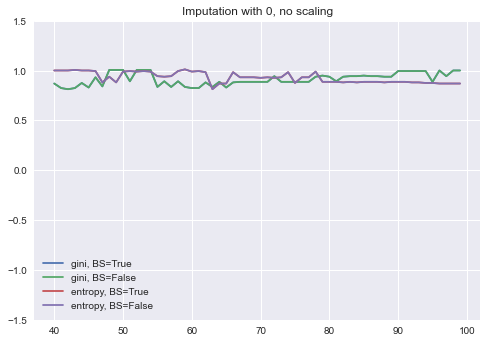

In [12]:
# Simple Imputation with 0
preprocessed_data = pd.DataFrame(SimpleImputer(missing_values=np.NaN, strategy="constant", fill_value=0).fit_transform(raw_data))

# No Scaling

plot_params(preprocessed_data, labels, fileName="companies_rfc_Imputation_0_noScaling", title="Imputation with 0, no scaling")


In [ ]:
# Simple Imputation with 0
preprocessed_data = pd.DataFrame(SimpleImputer(missing_values=np.NaN, strategy="constant", fill_value=0).fit_transform(raw_data))

# Normalization with l1 norm
preprocessed_data = pd.DataFrame(Normalizer(norm="l1").fit_transform(preprocessed_data))

plot_params(preprocessed_data, labels, fileName="companies_rfc_Imputation_0_l1Norm", title="Imputation with 0, normalization with l1")

In [ ]:
# Simple Imputation with 0
preprocessed_data = pd.DataFrame(SimpleImputer(missing_values=np.NaN, strategy="constant", fill_value=0).fit_transform(raw_data))

# Normalization with l2 norm
preprocessed_data = pd.DataFrame(Normalizer(norm="l2").fit_transform(preprocessed_data))

plot_params(preprocessed_data, labels, fileName="companies_rfc_Imputation_0_l2Norm", title="Imputation with 0, normalization with l2")

In [ ]:
# Simple Imputation with 0
preprocessed_data = pd.DataFrame(SimpleImputer(missing_values=np.NaN, strategy="constant", fill_value=0).fit_transform(raw_data))

# Normalization with max norm
preprocessed_data = pd.DataFrame(Normalizer(norm="max").fit_transform(preprocessed_data))

plot_params(preprocessed_data, labels, fileName="companies_knn_Imputation_0_maxNorm", title="Imputation with 0, normalization with max norm")